In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("/home/inventor/Datasets/Medical Cost/Medical _Cost/insurance.csv")

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)

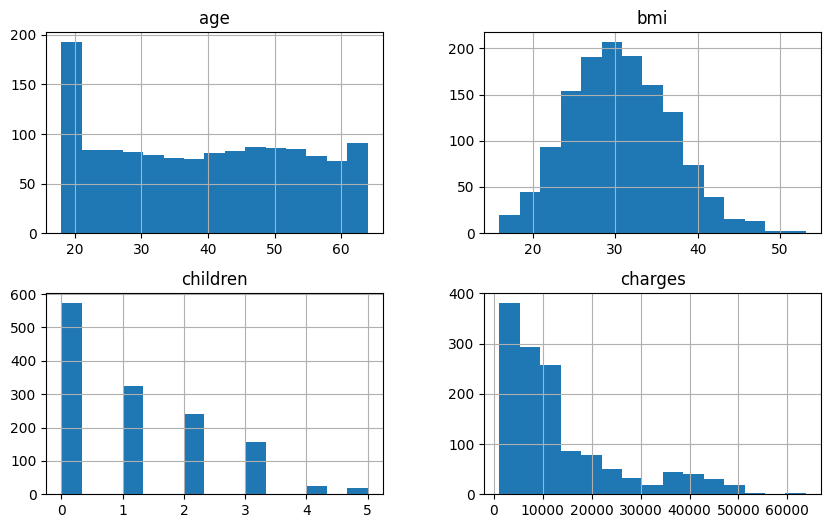

In [8]:
df.hist(figsize=(10,6), bins=15)
plt.show()

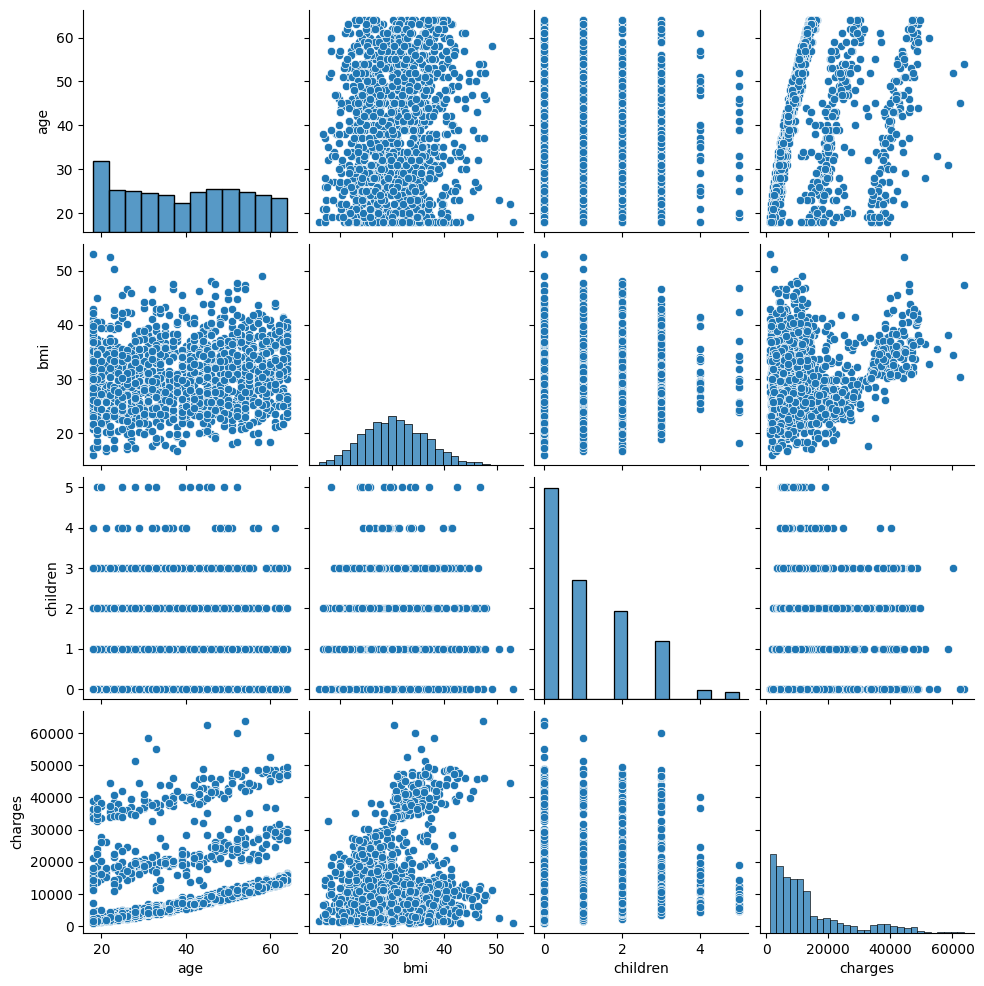

In [9]:
sns.pairplot(df)

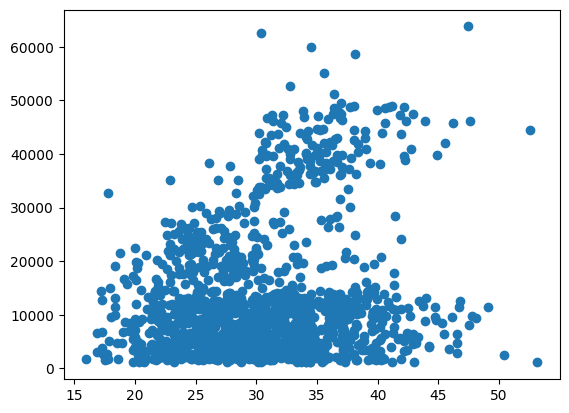

In [10]:
plt.scatter(df["bmi"], df["charges"])

In [11]:
num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"]]
cat_cols = [col for col in df.columns if df[col].dtype not in ["float64", "int64"]]

In [15]:
# Normalize the Data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499


In [43]:
one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first")

encoder = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoder, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)

In [44]:
encoded_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857,0.0,1.0,0.0,0.0,1.0
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381,1.0,0.0,0.0,1.0,0.0
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373,1.0,0.0,0.0,1.0,0.0
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104,1.0,0.0,1.0,0.0,0.0
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499,1.0,0.0,1.0,0.0,0.0


In [45]:
encoded_df = encoded_df.drop(columns=["sex", "smoker", "region"], axis=1)

In [46]:
encoded_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,0.0,1.0,0.0,0.0,1.0
1,-1.511647,0.509422,-0.079442,-0.954381,1.0,0.0,0.0,1.0,0.0
2,-0.799350,0.383155,1.580143,-0.729373,1.0,0.0,0.0,1.0,0.0
3,-0.443201,-1.305052,-0.909234,0.719104,1.0,0.0,1.0,0.0,0.0
4,-0.514431,-0.292456,-0.909234,-0.777499,1.0,0.0,1.0,0.0,0.0


In [47]:
encoded_df.isnull().sum()

age                 1
bmi                 1
children            1
charges             1
sex_male            1
smoker_yes          1
region_northwest    1
region_southeast    1
region_southwest    1
dtype: int64

In [48]:
encoded_df.dropna(inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("charges", axis=1), encoded_df["charges"], test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1068, 8), (268, 8), (1068,), (268,))

In [57]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [215]:
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
y_train = (y_train - y_train.mean()) / y_train.std()

In [242]:
class Batch_Gradient_Descent():

    def __init__(self, learning_rate, epochs):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01
        self.intercept_ = 0

        for i in range(self.epochs):

            y_hat = self.intercept_ + np.dot(X_train, self.coef_)
            intercept_slope = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ + (self.lr * intercept_slope)
            
            error = y_train - y_hat
            coef_slope = -2 * np.mean((y_train - y_hat)[:, np.newaxis] * X_train, axis=0)
            self.coef_ = self.coef_ + (self.lr * coef_slope)

            if i % 100 == 0:
                print(f"Epoch {i}: Intercept_: {self.intercept_}, Coef: {self.coef_}")
        
        print(f'Intercept_: {self.intercept_}, Coef: {self.coef_}')
        
    
    def predict(self, X_test):
        X_test = np.insert(X_test, 0,1, axis=1)
        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

In [308]:
bgd = Batch_Gradient_Descent(learning_rate=0.00000000001, epochs=1000)

In [309]:
bgd.fit(X_train, y_train)

Epoch 0: Intercept_: 1.5623172124115063e-13, Coef: [ 0.00781159  0.00804086  0.02724613  0.00352234 -0.00993485  0.00803976
  0.0096526   0.0181069  -0.00025242]
Epoch 100: Intercept_: 1.5779403876915e-11, Coef: [ 0.00781159  0.00804086  0.02724613  0.00352234 -0.00993485  0.00803976
  0.0096526   0.0181069  -0.00025242]
Epoch 200: Intercept_: 3.140257609508156e-11, Coef: [ 0.00781159  0.00804086  0.02724613  0.00352234 -0.00993485  0.00803976
  0.0096526   0.0181069  -0.00025242]
Epoch 300: Intercept_: 4.702574837574082e-11, Coef: [ 0.00781159  0.00804086  0.02724613  0.00352234 -0.00993485  0.00803976
  0.0096526   0.0181069  -0.00025242]
Epoch 400: Intercept_: 6.26489207188928e-11, Coef: [ 0.00781159  0.00804086  0.02724613  0.00352234 -0.00993485  0.00803976
  0.0096526   0.0181069  -0.00025242]
Epoch 500: Intercept_: 7.827209312453747e-11, Coef: [ 0.00781159  0.00804086  0.02724613  0.00352234 -0.00993485  0.00803976
  0.0096526   0.0181069  -0.00025242]
Epoch 600: Intercept_: 9.3

In [310]:
y_pred = bgd.predict(X_test)

In [311]:
def r2_score_custom(y_true, y_pred):

    mean_value = np.mean(y_true)
    
    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score = 1 - (SSE / TSS)
    return r2_score

In [312]:
r2_score_c = r2_score_custom(y_test, y_pred)
r2_score_c

np.float64(0.008476654690953489)

In [186]:
from sklearn.linear_model import SGDRegressor

In [192]:
sgd = SGDRegressor(learning_rate="constant",eta0 = 0.01, max_iter=100,)

In [193]:
sgd.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [194]:
y_pred_sk = sgd.predict(X_test)

In [195]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(y_test, y_pred_sk)

r2_score_sk

0.19267227489017813

In [196]:
sgd.coef_, sgd.intercept_

(array([ 0.24548121,  0.13901634,  0.06090897,  0.06427008,  0.71296352,
        -0.04407808, -0.10785082, -0.09251117]),
 array([-0.26506182]))